# Introduzione  
In questo notebook si testano le modifiche della funzione di o3d per cercare d inserire un concetto di distanza dal piano per grafi

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import pyvista as pv

In [15]:
# point_cloud = np.loadtxt('data/bunny_fine.txt', delimiter=",", skiprows=1)           # without normals
# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(point_cloud[:,:3])

## lambda = 0

In [35]:
# true normals:
#point_cloud_normals = np.loadtxt('sphere_normals.txt', delimiter=",", skiprows=1)           # sphere with normals
point_cloud_normals = np.loadtxt('data/bunny_fine_with_N.txt', delimiter=",", skiprows=1)           # bunny with normals

pcd_norm = o3d.geometry.PointCloud()
pcd_norm.points = o3d.utility.Vector3dVector(point_cloud_normals[:,3:6])
pcd_norm.normals = o3d.utility.Vector3dVector(point_cloud_normals[:,:3])

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point_cloud_normals[:,3:6])

pcd.estimate_normals()
pcd.orient_normals_consistent_tangent_plane(11, 0, 0.1) #knn, lambda, cosalpha            # 100 for sphere, 11 for bunny


# est_normals = np.asarray(pcd.normals)
# est_normals = - est_normals

# pcd.normals = o3d.utility.Vector3dVector(est_normals)

Procedo con tangenti NUOVE open3D


## lambda != 0, cos = 1
**NB**: Esegui solo 1 delle sezioni


In [42]:
# true normals:
#point_cloud_normals = np.loadtxt('sphere_normals.txt', delimiter=",", skiprows=1)           # sphere with normals
point_cloud_normals = np.loadtxt('data/bunny_fine_with_N.txt', delimiter=",", skiprows=1)           # bunny with normals

pcd_norm = o3d.geometry.PointCloud()
pcd_norm.points = o3d.utility.Vector3dVector(point_cloud_normals[:,3:6])
pcd_norm.normals = o3d.utility.Vector3dVector(point_cloud_normals[:,:3])

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point_cloud_normals[:,3:6])

pcd.estimate_normals()
pcd.orient_normals_consistent_tangent_plane(5, 1, 1) #knn, lambda, cosalpha            # 100 for sphere, 11 for bunny

# est_normals = np.asarray(pcd.normals)
# est_normals = - est_normals

# pcd.normals = o3d.utility.Vector3dVector(est_normals)

Procedo con tangenti NUOVE open3D


[31.95802510467197, 47.20060792027052, 25.004488541709904, 41.21916592939832, 36.23616346238144, 27.093486933120808, 48.15060852025894, 16.34031854163975, 12.2753660496705, 39.91113024227177, 16.995758673596363, 43.269853687024806, 31.822849443539557, 43.84909183979493, 18.68683382175108, 23.96128451795528, 28.27740987914333, 38.48337728074385, 29.5993794290328, 36.47713536116625, 25.384260435909137, 44.695424809216284, 15.35702316310727, 10.403446557409596, 18.31535125294359, 33.14796545212387, 38.521327005761776, 24.767226249997535, 18.441338140727673, 33.018628529884225, 34.769755121170405, 40.20614512480069, 20.700390168202908, 23.563954857401107, 27.881552799506096, 24.858144693883386, 33.40900532157531, 42.69097292515243, 38.12560879859341, 20.456511573709527, 28.360622655875694, 22.915541176800073, 14.082332358094677, 17.781611353809545, 20.673348696817822, 31.02958473578928, 26.98364685190637, 41.5184921849064, 18.546352939740054, 42.2462137194762, 30.92040022953107, 23.6386231

{'whiskers': [<matplotlib.lines.Line2D at 0x7f430880cb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4308803550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f430880cc40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4308803940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f43088038e0>],
 'means': []}

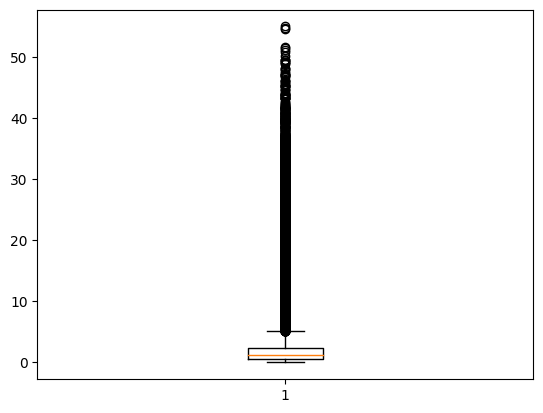

In [43]:
error_angle = []

for i in range(point_cloud_normals.shape[0]):
    scalar_prod = 0.0
    vec1 = 0.0
    vec2 = 0.0
    for k in range(3):
        scalar_prod += pcd.normals[i][k] * pcd_norm.normals[i][k]
    vec1 = np.sqrt(np.sum(pcd.normals[i]**2))           # estimated
    vec2 = np.sqrt(np.sum(pcd_norm.normals[i]**2))      # true
    alpha = np.arccos(scalar_prod / (vec1 * vec2)) / 3.14 * 180
    
    error_angle.append(alpha)

print(error_angle) 
norm_error = np.sum(error_angle) / point_cloud_normals.shape[0]
print("average error", norm_error)
print("max error", np.max(error_angle))
print("min error", np.min(error_angle))

plt.boxplot(error_angle)

In [31]:
len(pcd.points)

41695

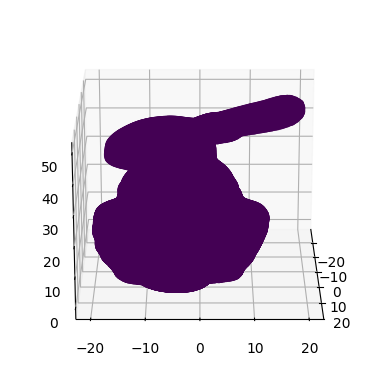

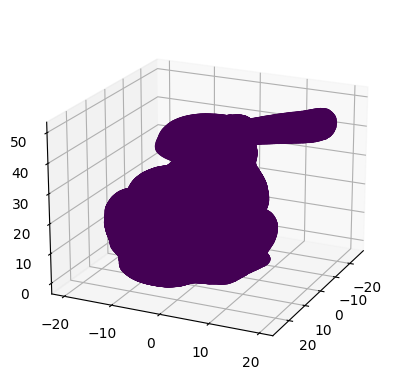

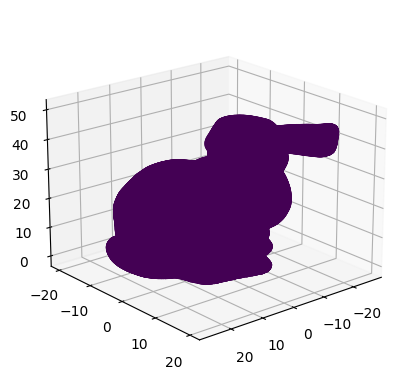

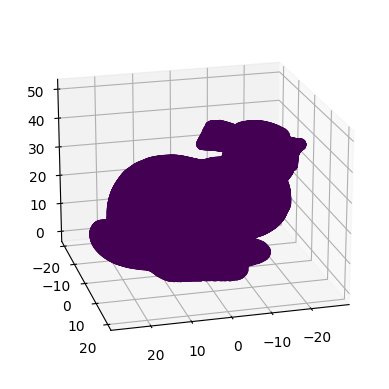

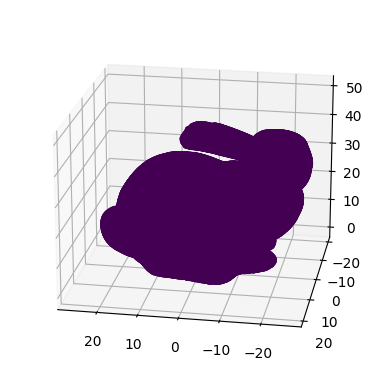

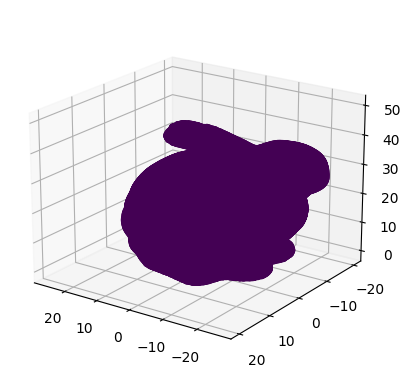

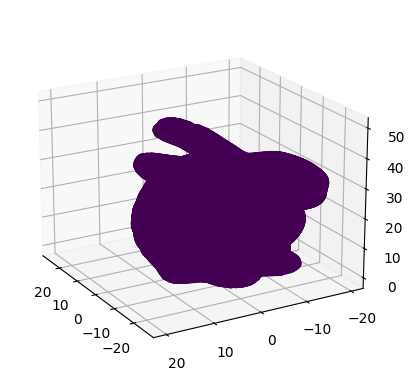

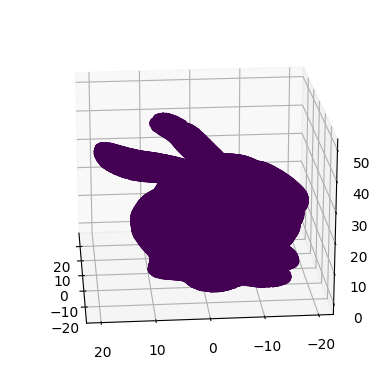

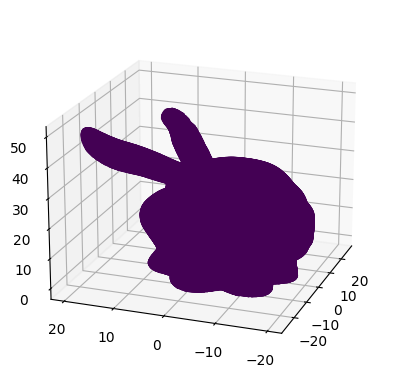

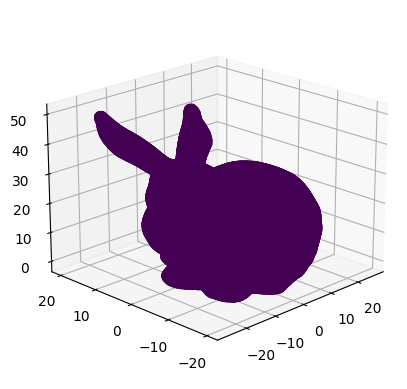

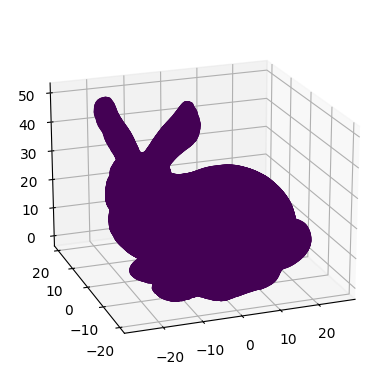

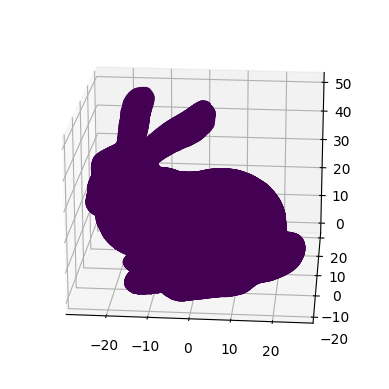

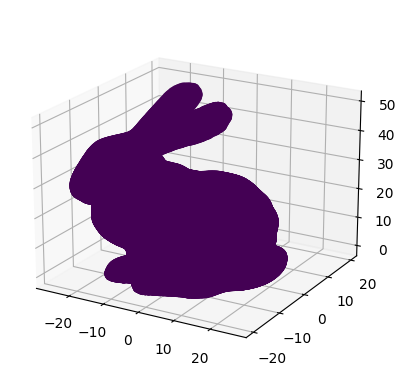

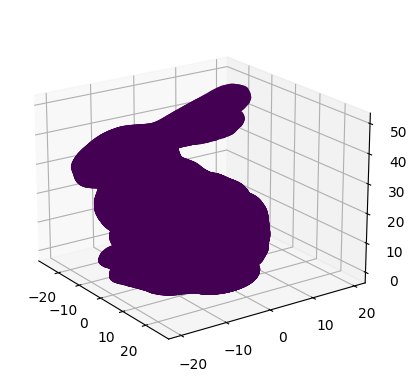

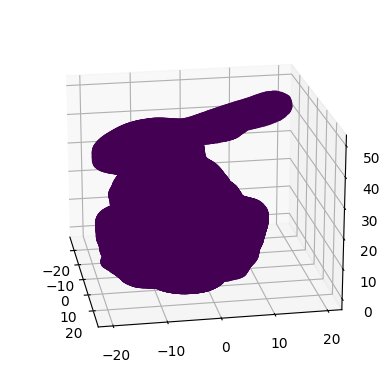

In [44]:
# dove sono le normali più problematiche:
# perc = np.percentile(error_angle, 97.85)
# print(perc)
idx = np.where(np.asarray(error_angle) > 90)
colors = np.zeros(len(error_angle))
colors[idx] = 1.0
maxm = np.argmax(np.asarray(pcd.points)[:,2])
#colors[maxm] = 3.0

a = [0,25,50,75,100,125,150,175,200,225,250,275,300,325,350]
for i in a:
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(np.asarray(pcd.points)[:,0], np.asarray(pcd.points)[:,1], np.asarray(pcd.points)[:,2], c=colors)

    ax.view_init(elev=20, azim=i)

In [45]:
poisson_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8, width=0, scale=1.1, linear_fit=False)[0]
p_mesh_crop = poisson_mesh
p_mesh_crop.paint_uniform_color(np.array([[0.5],[0.5],[0.5]]))

p_mesh_crop.compute_vertex_normals()
print(np.asarray(p_mesh_crop.triangle_normals))
o3d.visualization.draw_geometries([p_mesh_crop])

[[-1.77338256e-02  4.78689278e-02 -9.98696189e-01]
 [ 3.65938609e-04  2.97951067e-02 -9.99555960e-01]
 [-3.60226306e-02  2.97757709e-02 -9.98907290e-01]
 ...
 [ 8.66354919e-01  1.64768434e-01  4.71466349e-01]
 [ 8.79969853e-01  1.54898105e-01  4.49065291e-01]
 [ 8.57458300e-01  2.70723921e-01  4.37577219e-01]]
